## Imports


In [3]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")



## Preprocessing and Extraction of Data

In [33]:
data1 = pd.read_csv("/Users/shray/Downloads/spotify_songs.csv")
data2 = pd.read_csv('/Users/shray/Downloads/spotify_data.csv')


print(data1.info())
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [35]:
# Drop rows with null values
data1_cleaned = data1.dropna()
data2_cleaned = data2.dropna()

random_sample_size = 100
# Adjust random_state as needed
data2_cleaned= data2_cleaned.sample(n=random_sample_size, random_state=42)  # Adjust random_state as needed


# Display information about the cleaned DataFrame
print(data1_cleaned.info())
print(data2_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 32828 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32828 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32828 non-null  int64  
 4   track_album_id            32828 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32828 non-null  object 
 7   playlist_name             32828 non-null  object 
 8   playlist_id               32828 non-null  object 
 9   playlist_genre            32828 non-null  object 
 10  playlist_subgenre         32828 non-null  object 
 11  danceability              32828 non-null  float64
 12  energy                    32828 non-null  float64
 13  key                       32828 non-null  int64  
 14  loudness   

In [50]:
print(data2_cleaned.columns)

new_column_name = 'index'
data2_cleaned = data2_cleaned.rename(columns={'Unnamed: 0': new_column_name})

# # Assuming df is your DataFrame
# data2_cleaned.reset_index(drop=True, inplace=True)

# # # Now drop the 'index' column
# data2_cleaned.drop('index', axis=1, inplace=True)

print(data2_cleaned.columns)

Index(['index', 'artist_name', 'track_name', 'track_id', 'popularity', 'year',
       'genre', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'cluster',
       'cluster_label'],
      dtype='object')
Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'cluster', 'cluster_label'],
      dtype='object')


## Extensive EDA on data

In [53]:
data2_cleaned.head()


,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster,cluster_label
0,Alexandre Desplat,Memorial,1pJdDgOdRUEizV3s3TfJXX,16,2012,french,0.1870,0.102,8,-23.448,...,0.0394,0.76700,0.979000,0.2810,0.0418,64.790,83813,4,5,13
1,Sunmoon,Wonder,6pWZtdHl6zVDMRfAjIv2RB,40,2022,french,0.6900,0.626,1,-9.116,...,0.0354,0.80100,0.000261,0.0928,0.3390,114.925,145119,3,3,4
2,Cradle Of Filth,The Black Goddess Rises II - Ebon Nemesis,4P0OtXWT10zbI2RhEhzEbz,20,2001,black-metal,0.1950,0.880,2,-7.119,...,0.1470,0.00404,0.086300,0.1130,0.2590,200.025,442093,4,4,12
3,Venetian Snares,Welfare Wednesday,3QH6kXXor5xDmW1atcCcco,9,2010,techno,0.5530,0.951,10,-1.145,...,0.0517,0.01290,0.016200,0.3160,0.2470,173.963,243347,1,8,7
4,Crib,Constant,5gn3NZfn8eoCdNxFMbMtlz,0,2000,ambient,0.0608,0.115,2,-25.985,...,0.0519,0.20300,0.841000,0.1120,0.0312,67.494,619227,4,6,2


In [52]:
print("Shape of Dataset :",data2_cleaned.shape)

Shape of Dataset : (100, 21)


In [51]:
data2_cleaned.isna().sum().sort_values(ascending=False)

artist_name         0
speechiness         0
cluster             0
time_signature      0
duration_ms         0
tempo               0
valence             0
liveness            0
instrumentalness    0
acousticness        0
mode                0
track_name          0
loudness            0
key                 0
energy              0
danceability        0
genre               0
year                0
popularity          0
track_id            0
cluster_label       0
dtype: int64

In [40]:
data2_cleaned.describe()

,index,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,7.380146e+05,16.270000,2011.370000,0.497908,0.653856,5.160000,-8.982880,0.630000,0.074159,0.295478,0.285184,0.191315,0.411040,117.274180,252384.370000,3.83000
std,4.208367e+05,14.255146,7.010317,0.189288,0.276697,3.770486,5.532072,0.485237,0.064757,0.360509,0.392552,0.182959,0.260545,29.271343,103697.002644,0.55149
min,2.257800e+04,0.000000,2000.000000,0.060800,0.047600,0.000000,-26.867000,0.000000,0.025400,0.000001,0.000000,0.021400,0.000010,64.790000,78333.000000,1.00000
25%,4.017152e+05,4.000000,2006.000000,0.376000,0.417000,1.750000,-11.167750,0.000000,0.037000,0.001557,0.000005,0.092600,0.185000,94.520250,183401.250000,4.00000
50%,7.381515e+05,14.000000,2010.500000,0.506500,0.740000,5.000000,-7.279000,1.000000,0.051150,0.075150,0.008445,0.116000,0.387500,119.496000,231208.000000,4.00000
75%,1.096457e+06,27.250000,2018.000000,0.636750,0.900000,8.000000,-5.481000,1.000000,0.077150,0.668500,0.776250,0.208250,0.600750,135.021750,293203.500000,4.00000
max,1.443971e+06,55.000000,2023.000000,0.979000,0.998000,11.000000,-0.646000,1.000000,0.394000,0.990000,0.979000,0.953000,0.969000,200.025000,619227.000000,5.00000


In [31]:
data2_cleaned.duplicated().any()

False

In [41]:
#Lets check for Cardinality
data2_cleaned.nunique()


index               100
artist_name         100
track_name          100
track_id            100
popularity           44
year                 24
genre                55
danceability         92
energy               91
key                  12
loudness            100
mode                  2
speechiness          89
acousticness         98
instrumentalness     78
liveness             88
valence              98
tempo               100
duration_ms         100
time_signature        4
dtype: int64

In [35]:
data2_cleaned['year'].value_counts()

year
2017    4876
2018    4859
2020    4835
2022    4809
2019    4775
2012    4679
2014    4629
2021    4553
2013    4516
2015    4514
2009    4089
2010    4087
2008    4039
2011    3975
2007    3972
2006    3927
2004    3776
2000    3769
2005    3714
2001    3632
2003    3630
2002    3586
2016    3438
2023    3321
Name: count, dtype: int64

In [36]:
data2_cleaned['track_id'].nunique()

100000

In [54]:
data2_cleaned['artist_name'].value_counts()[:11]

artist_name
Alexandre Desplat     1
Damon Wild            1
Beborn Beton          1
HIM                   1
Birdflesh             1
Clutch                1
Joan Manuel Serrat    1
Ocean Sounds          1
Killswitch Engage     1
Joe Avati             1
Sandra Mbuyi          1
Name: count, dtype: int64

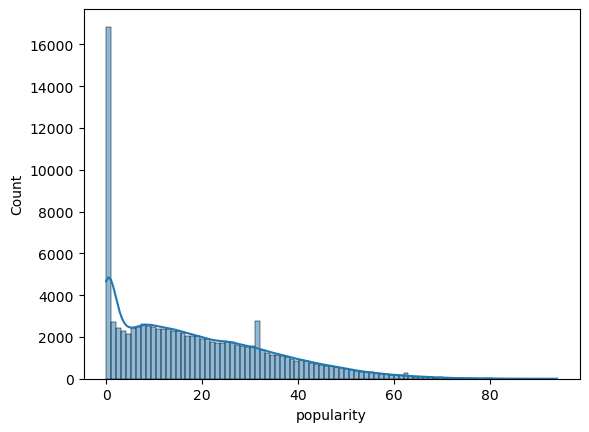

In [39]:
sns.histplot(data=data2_cleaned, x='popularity',kde=True)
plt.show()

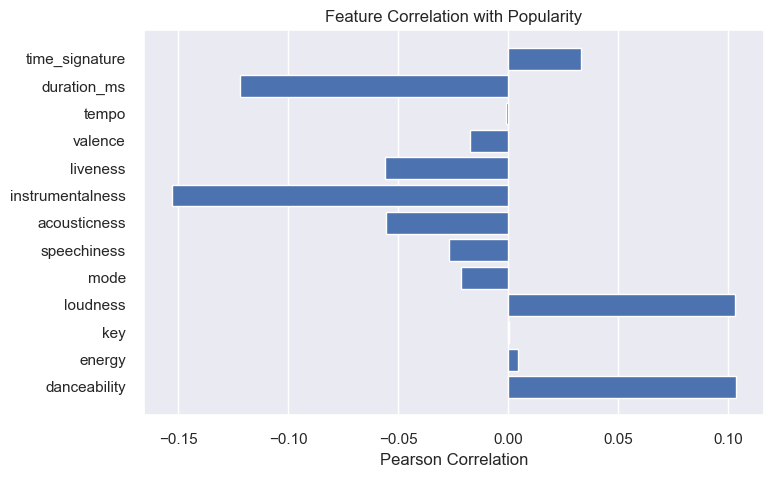

<Axes: title={'center': 'Feature Correlation with Popularity'}, xlabel='Pearson Correlation'>

In [102]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']

X, y = data2_cleaned[feature_names], data2_cleaned['popularity']

# Instantiate the visualizer
visualizer = FeatureCorrelation(
    labels=feature_names,
    title="Feature Correlation with Popularity",
    xlabel="Feature",
    ylabel="Popularity"
)

plt.rcParams['figure.figsize']=(8,5)
visualizer.fit(X, y)  # Fit the data to the visualizer
visualizer.show()



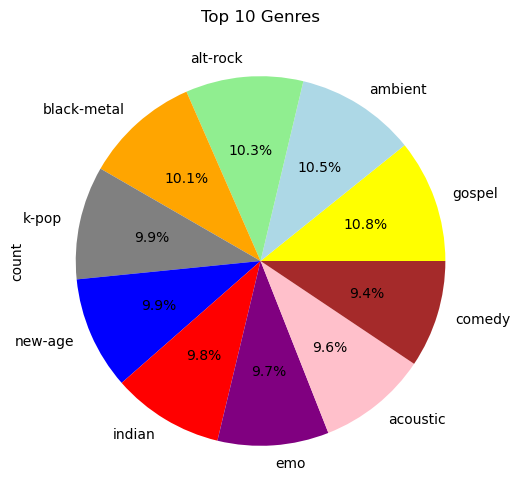

In [42]:
import matplotlib.pyplot as plt

# Assuming data2_cleaned is your DataFrame
top_genres = data2_cleaned['genre'].value_counts().nlargest(10)

# Define custom colors for the slices
custom_colors = ['yellow', 'lightblue', 'lightgreen', 'orange', 'grey', 'blue', 'red', 'purple', 'pink', 'brown']

# Create a pie chart with the top 10 genres
plt.figure(figsize=[10, 6])
top_genres.plot.pie(autopct='%3.1f%%', colors=custom_colors)
plt.title('Top 10 Genres')
plt.show()


In [52]:
def plot(col):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'wspace': 0.4, 'hspace': 0.4})
    sns.boxplot(data=data2_cleaned, x=col, ax=axes[0])
    sns.distplot(a=data2_cleaned[col], ax=axes[1], color='#ff4125')
    plt.show()

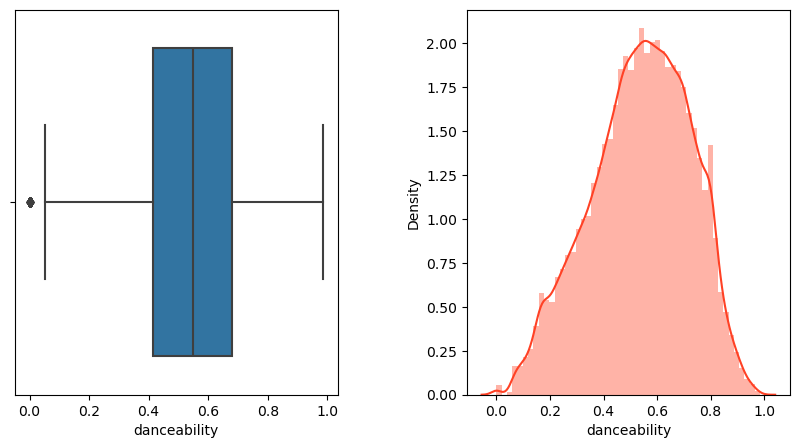

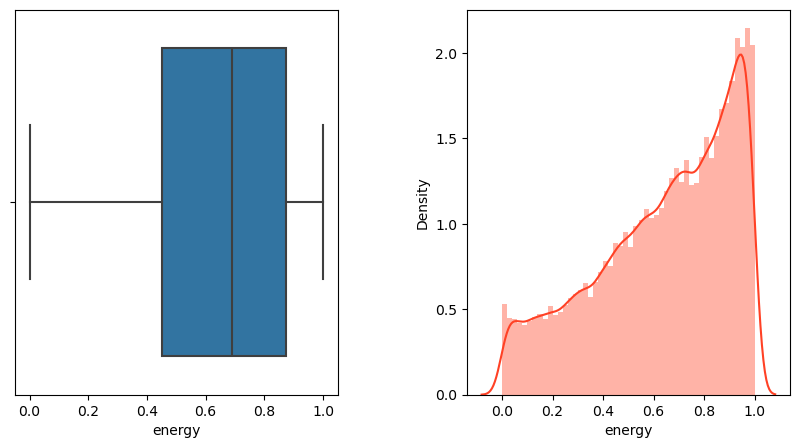

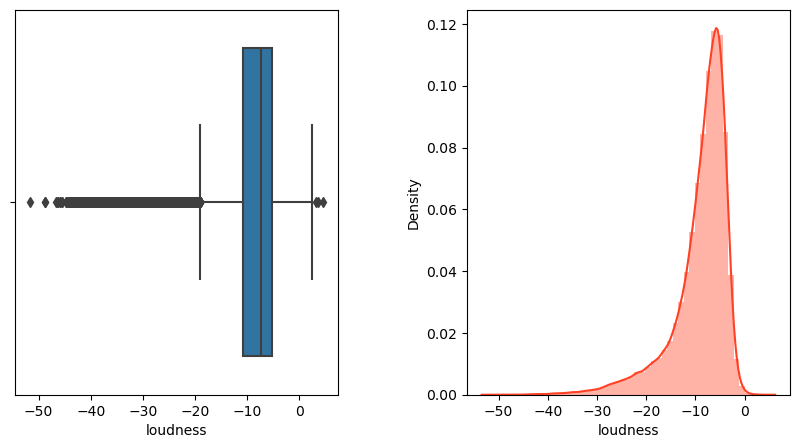

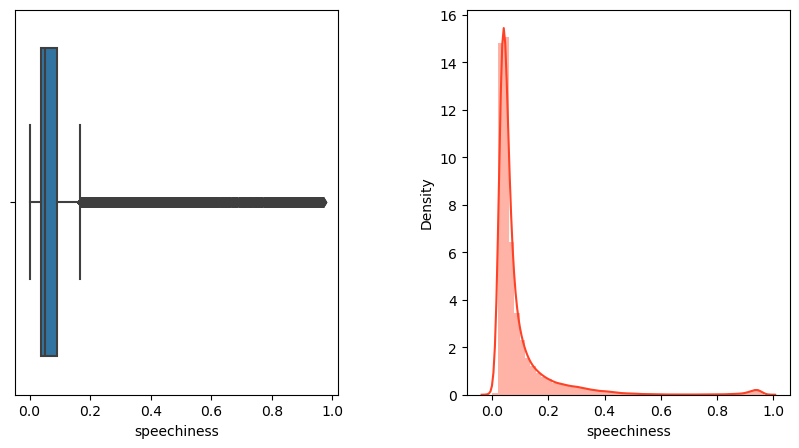

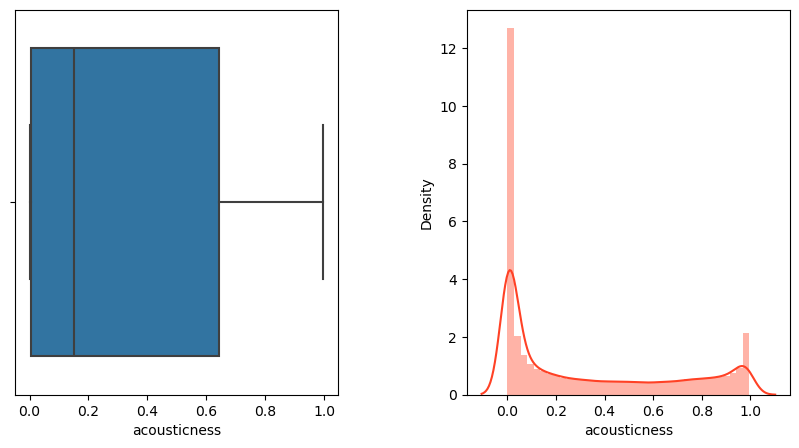

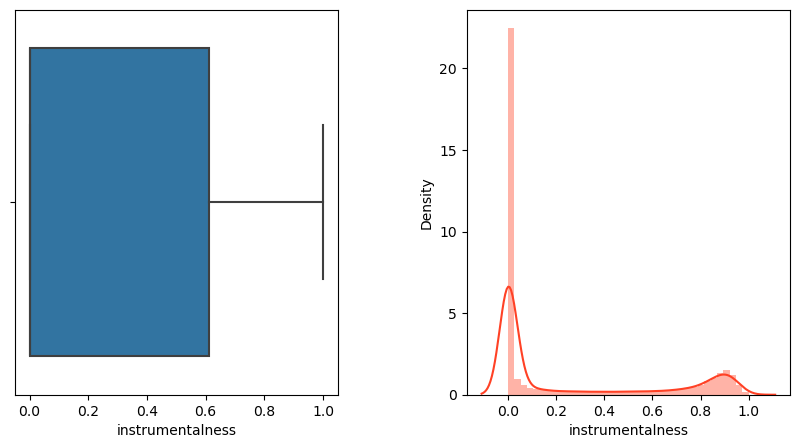

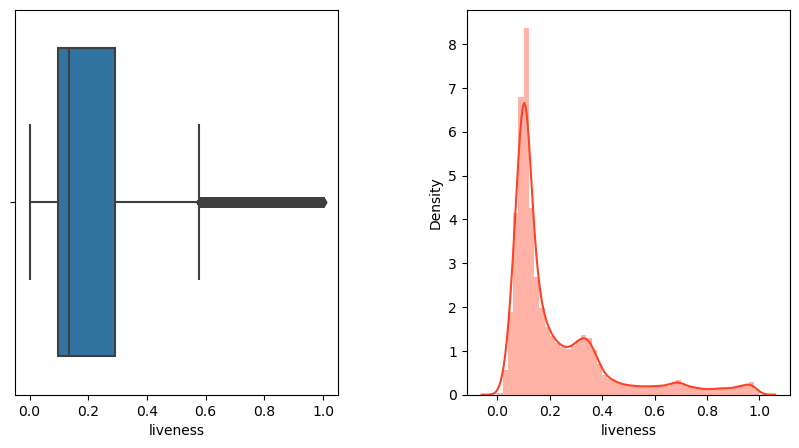

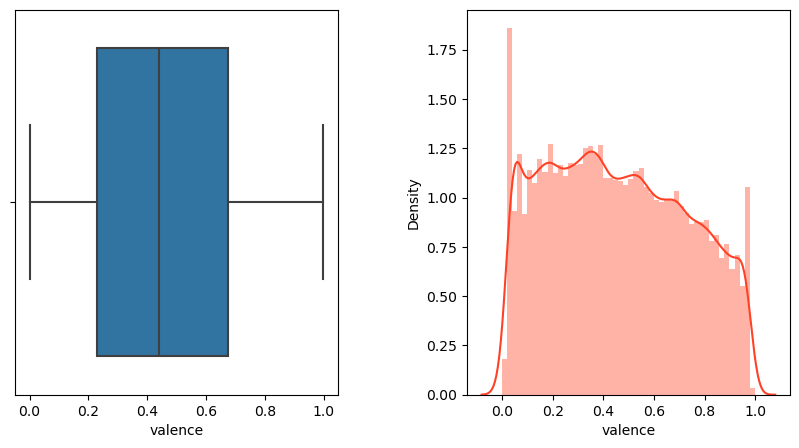

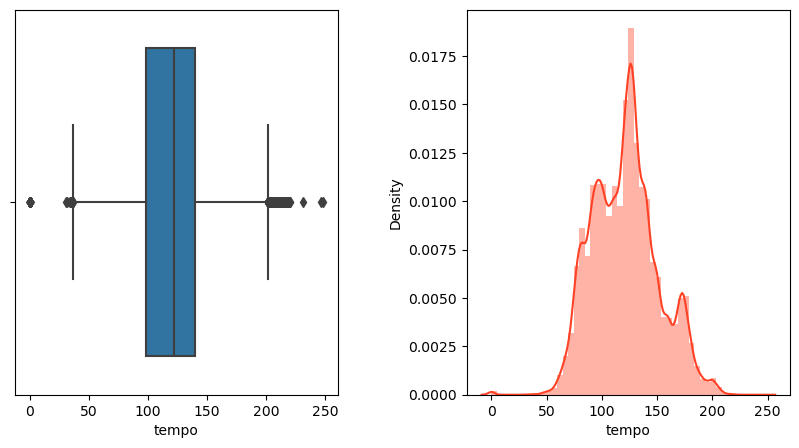

In [55]:
plot('danceability')
plot('energy')
plot('loudness')
plot('speechiness')
plot('acousticness')
plot('instrumentalness')
plot('liveness')
plot('valence')
plot('tempo')


In [56]:
# which year has the most releases
print(data2_cleaned['year'].max())
print(data2_cleaned['year'].min())

2023
2000


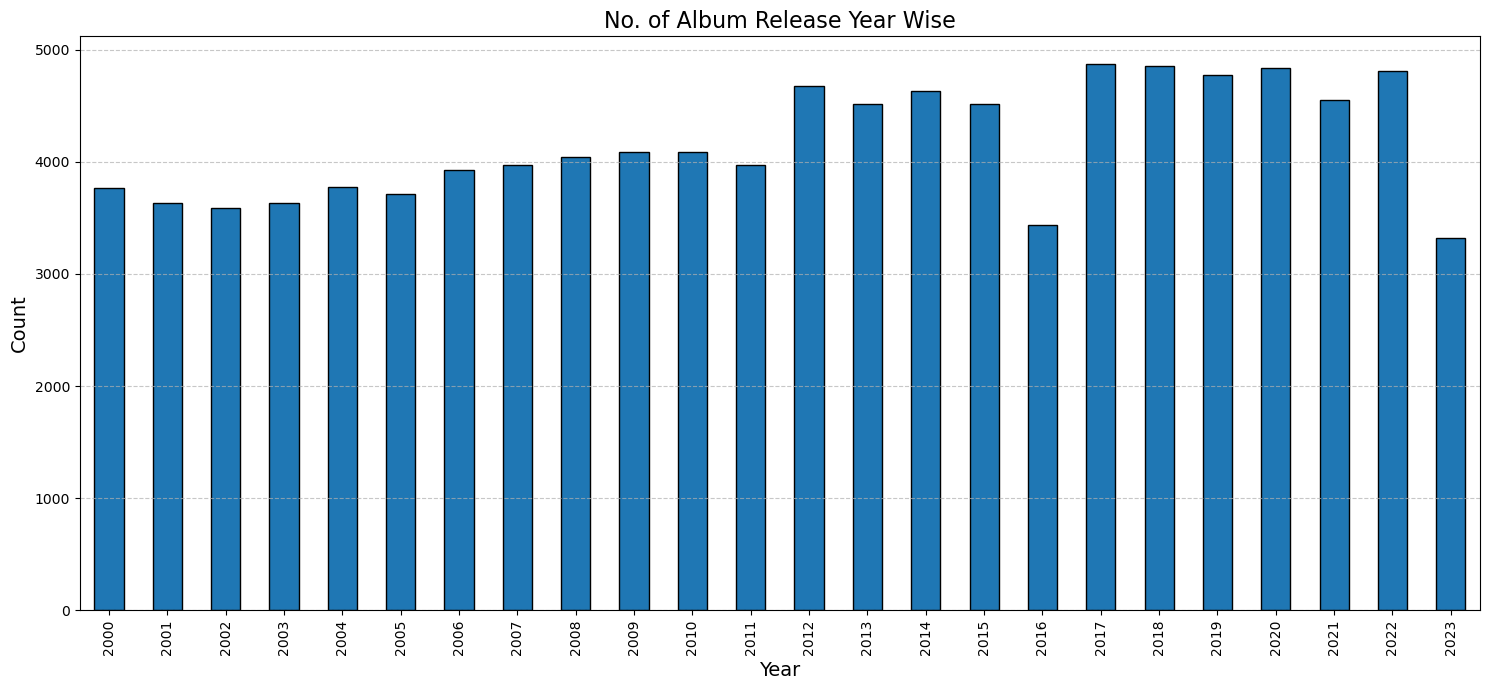

In [64]:
import matplotlib.pyplot as plt

# Assuming data2_cleaned is your DataFrame
paper = plt.figure(figsize=(15, 7))

# Sort the years in ascending order and plot a bar chart
data2_cleaned['year'].value_counts().sort_index()[:].plot.bar(edgecolor='black')

plt.xlabel('Year', size=14)
plt.ylabel('Count', size=14)
plt.title('No. of Album Release Year Wise', size=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Axes: xlabel='decade', ylabel='count'>

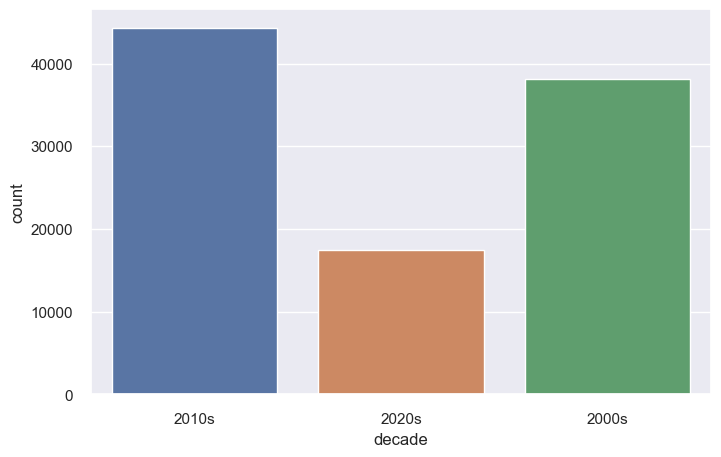

In [49]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

data2_cleaned['decade'] = data2_cleaned['year'].apply(get_decade)

sns.set(rc={'figure.figsize':(8 ,5)})
sns.countplot(x='decade', data=data2_cleaned)

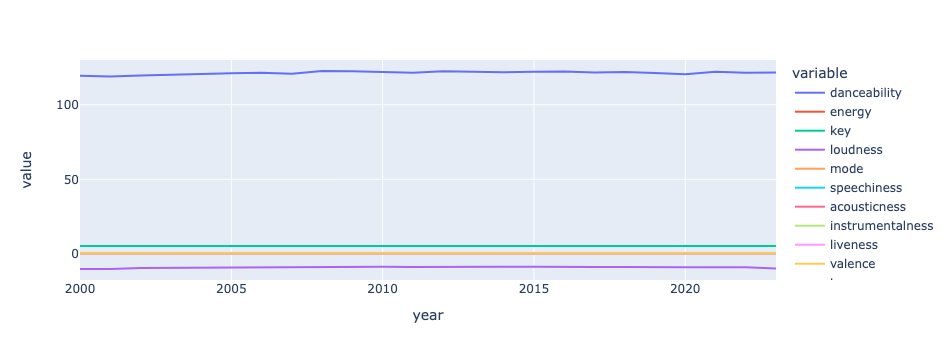

In [83]:
sound_features = ['danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']

agg_data = data2_cleaned.groupby('year', as_index=False)[sound_features].mean()

# Create a line plot for the aggregated data
fig = px.line(agg_data, x='year', y=sound_features)

fig.show()

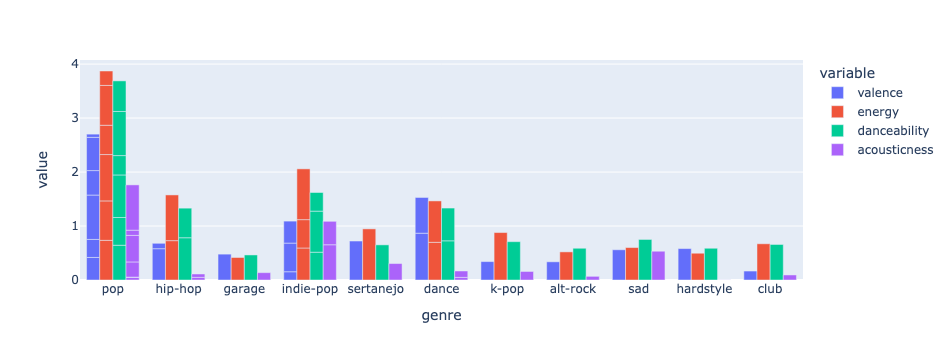

In [68]:
top10_genres = data2_cleaned.nlargest(20, 'popularity')

fig = px.bar(top10_genres, x='genre', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

## Bivariate Analysis

In [65]:
# Before jumping to the Bi-variate questions lets look at the heatmap
# Lets create a correlation matrix for all numeric columns
num_col = data2_cleaned.select_dtypes(exclude='object')

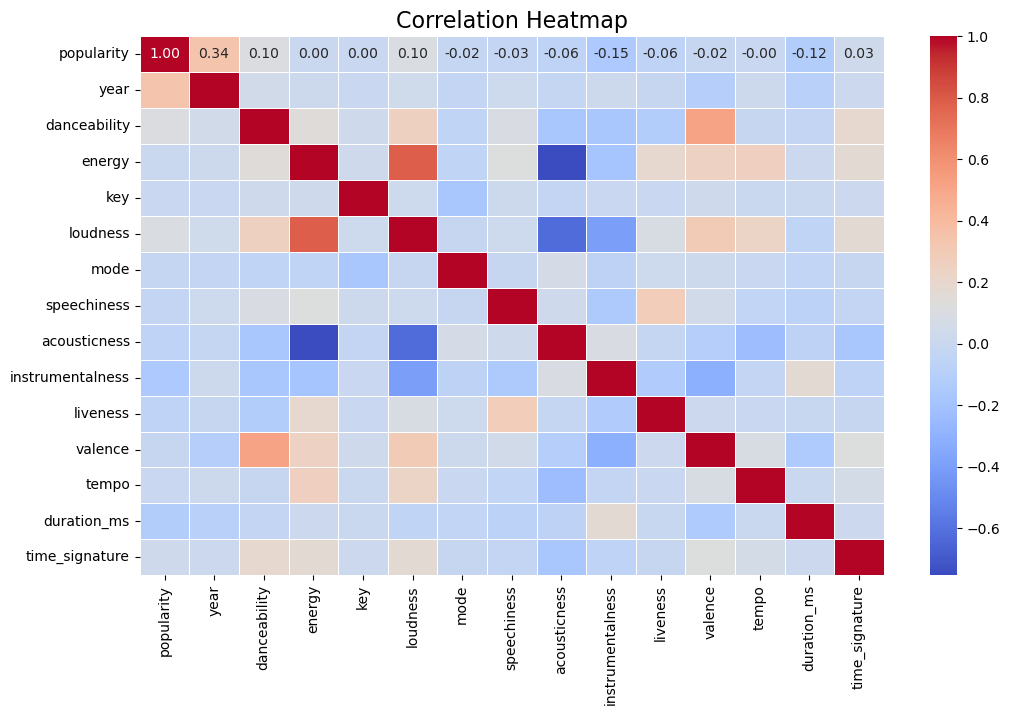

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
heatmap = sns.heatmap(num_col.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
heatmap.set_title("Correlation Heatmap", fontsize=16)

plt.show()


### Energy and loudness are correlated
### Acousticness has a negative correlation with energy and loudness
### Valence and danceability are somewhat correlated


In [71]:
#Lets see which track is most popular
most_popular_index = data2_cleaned['popularity'].idxmax()
most_popular_track = data2_cleaned.loc[most_popular_index, 'track_name']

# Now lets see which track is least popular
least_popular_index = data2_cleaned['popularity'].idxmin()
least_popular_track = data2_cleaned.loc[least_popular_index, 'track_name']

#Lets print both most popular and least popular track
print(f"The most popular track is: {most_popular_track} with popularity {data2_cleaned.loc[most_popular_index, 'popularity']}")
print(f"The least popular track is: {least_popular_track} with popularity {data2_cleaned.loc[least_popular_index, 'popularity']}")


most_popular_artist = data2_cleaned.loc[most_popular_index,'artist_name']
print(f"The most popular track_artist is: {most_popular_artist}")


The most popular track is: Kill Bill with popularity 94
The least popular track is: Constant with popularity 0
The most popular track_artist is: SZA


In [73]:
popular_artists = data2_cleaned.groupby(by = 'artist_name')['popularity'].mean().sort_values(ascending = False)[:10]
df = pd.DataFrame({'Artist': popular_artists.index , 'Popularity': popular_artists.values})
df

,Artist,Popularity
0,Jung Kook,85.0
1,GAYLE,82.0
2,Offset,81.0
3,Yot Club,81.0
4,Eliza Rose,81.0
5,Harry Styles,80.0
6,Labrinth,80.0
7,Shubh,79.0
8,Öwnboss,78.0
9,Andra & The Backbone,77.0


In [81]:
# Let's see the most popular genre
most_popular_genre = data2_cleaned.groupby(by='genre')['popularity'].sum().sort_values(ascending=False)
most_popular_genre10 = most_popular_genre.head(10)
print(most_popular_genre10)


genre
alt-rock    72165
hip-hop     64710
dance       63422
country     51417
k-pop       48614
folk        46215
french      43130
chill       42736
emo         40803
jazz        40589
Name: popularity, dtype: int64


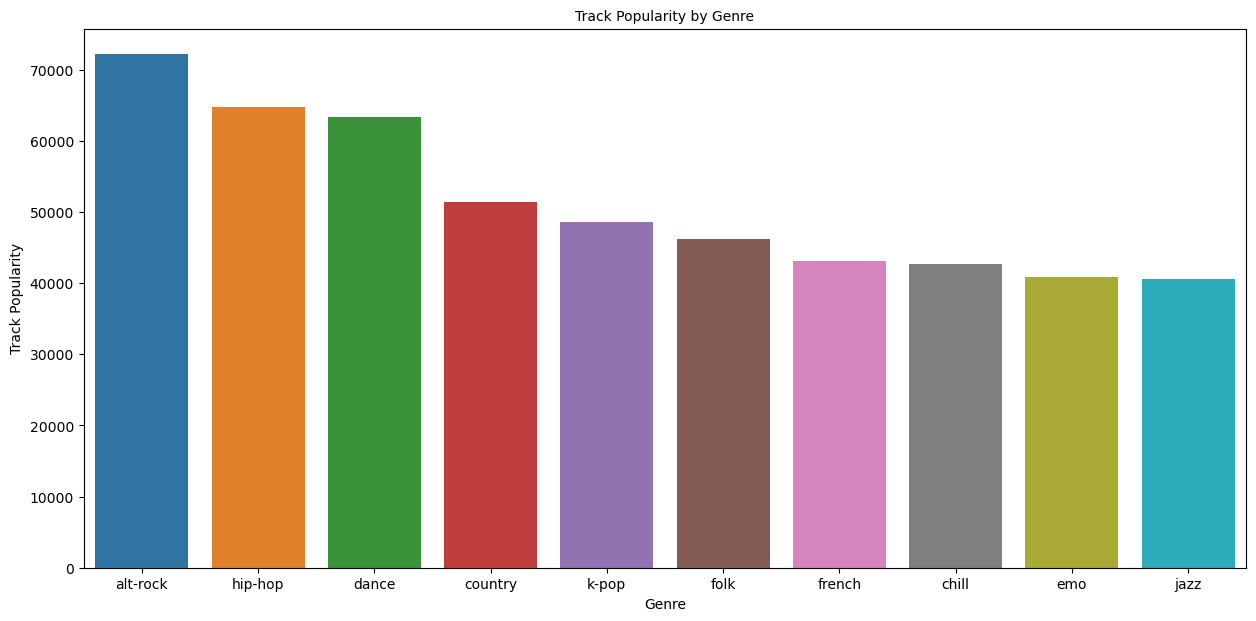

In [88]:
# Let's plot a Bar Graph
paper = plt.figure(figsize=(15,7))
sns.barplot(x=most_popular_genre10.index,y=most_popular_genre10.values )
plt.xlabel('Genre',size=10)
plt.ylabel('Track Popularity',size=10)
plt.title('Track Popularity by Genre',size=10)
plt.show()

In [92]:
# Let's see which genre has the higest average level of Energy
genre_avg_energy = data2_cleaned.groupby(by='genre')['energy'].mean().sort_values(ascending=False)
genre_avg_energy.head(10)

genre
death-metal      0.930875
grindcore        0.916487
metalcore        0.904634
hardstyle        0.889228
metal            0.887036
heavy-metal      0.882942
drum-and-bass    0.863541
hardcore         0.854605
hard-rock        0.845707
trance           0.842497
Name: energy, dtype: float64

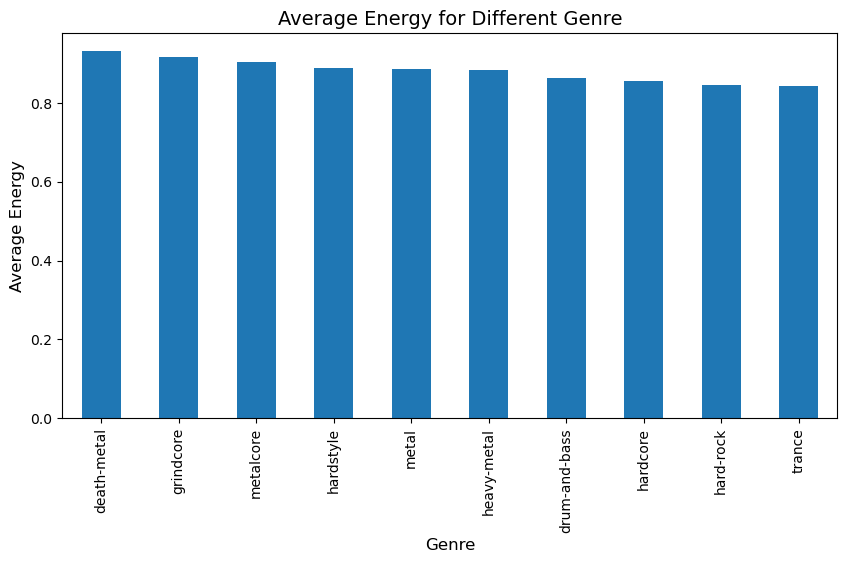

In [94]:
paper = plt.figure(figsize=(10,5))
genre_avg_energy.head(10).plot.bar()
plt.xlabel('Genre',size=12)
plt.ylabel('Average Energy',size=12)
plt.title('Average Energy for Different Genre',size=14)
plt.show()

## Multivariate Analysis

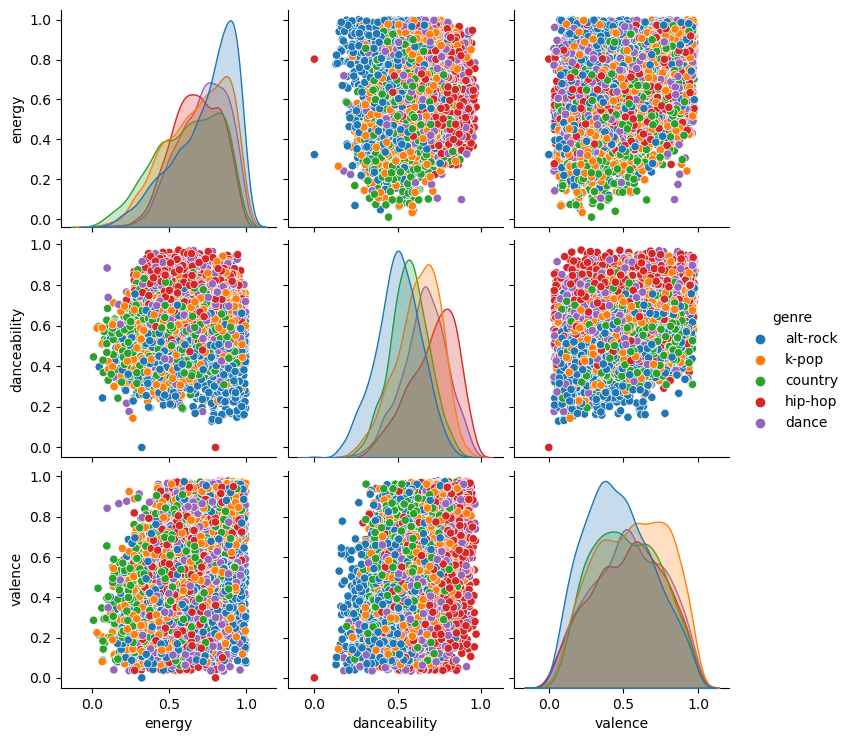

In [103]:
# Assuming 'most_popular_genre' is computed as before
top_genres = most_popular_genre.head(5).index

# Filtering the dataset for the top 10 genres
selected_data = data2_cleaned[data2_cleaned['genre'].isin(top_genres)]

# Selecting relevant columns
selected_columns = ['energy', 'danceability', 'valence', 'genre']

# Creating a pairplot
sns.pairplot(selected_data[selected_columns], hue='genre')
plt.show()


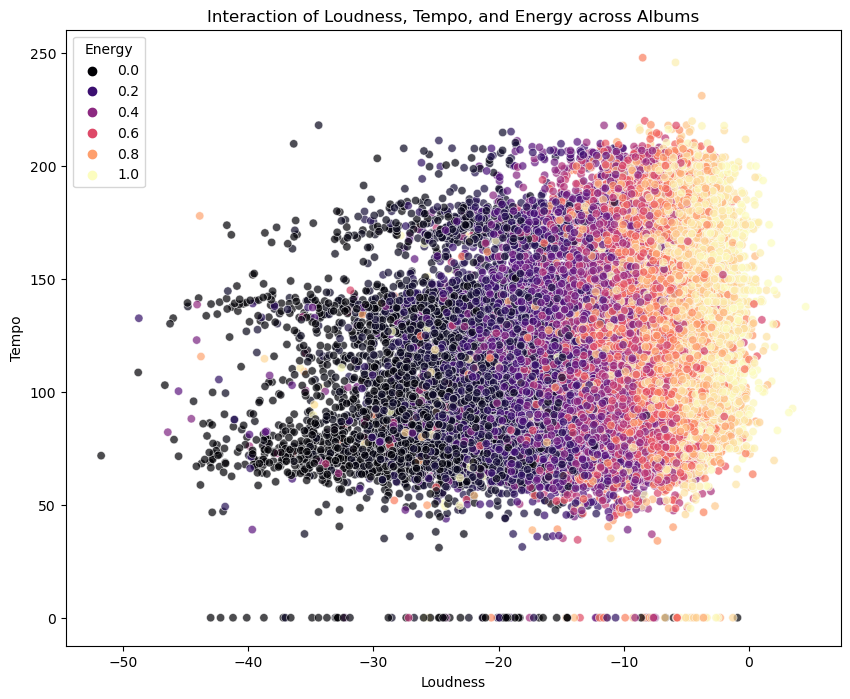

In [98]:
#  Let's plot a Scatterplot for loudness vs tempo 
plt.figure(figsize=(10, 8))
sns.scatterplot(x='loudness', y='tempo', hue='energy', data=data2_cleaned, palette='magma', alpha=0.7)
plt.title('Interaction of Loudness, Tempo, and Energy across Albums')
plt.xlabel('Loudness')
plt.ylabel('Tempo')
plt.legend(title='Energy')
plt.show()

# Content Based Recommendations

## Converting genres with K-Means

In [55]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
import pandas as pd
import plotly.express as px
import numpy as np

# Assuming 'data2_cleaned' is your DataFrame
X = data2_cleaned.select_dtypes(np.number)

# Extract 'genre' column from the original data
genre_subset = data2_cleaned['genre']

# Apply k-means clustering
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
cluster_pipeline.fit(X)
data2_cleaned['cluster'] = cluster_pipeline.predict(X)

# Fetch a subset of the data for t-SNE visualization

## add .head to data to make the computation faster
X_subset = X
cluster_subset = data2_cleaned['cluster']

# Apply t-SNE
tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X_subset)

# Create DataFrame for visualization
projection = pd.DataFrame(data=genre_embedding, columns=['x', 'y'])
projection['genre'] = genre_subset.reset_index(drop=True)
projection['cluster'] = cluster_subset.reset_index(drop=True)

# Check the resulting DataFrame
print(projection)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 2.336380
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.031578
[t-SNE] KL divergence after 1000 iterations: 0.341262
           x         y           genre  cluster
0  -1.430908  2.890610          french        3
1   4.175409  2.550421          french        7
2   8.692408  2.088463     black-metal        2
3   4.285843 -3.286828          techno        9
4  -2.100486  5.770891         ambient        1
..       ...       ...             ...      ...
95  1.970048 -1.940837             dub        5
96  4.875153 -1.857970           salsa        0
97  1.956751  6.128335         romance        4
98  2.005441 -2.383717  minimal-techno        5
99 -0.845717  3.123024       classical        3

[100 rows x 4 columns]


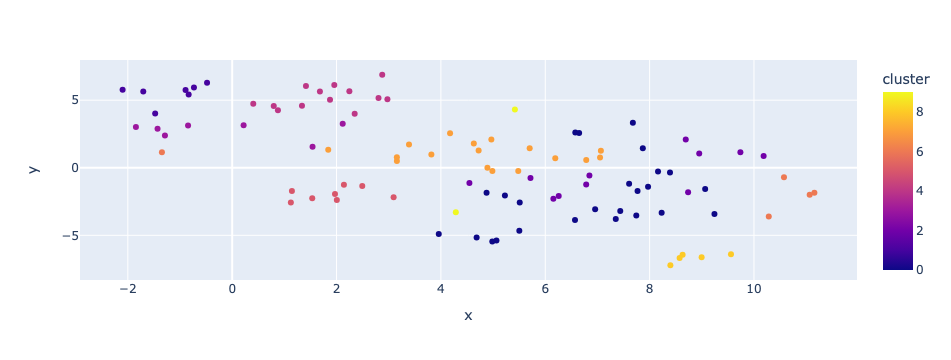

In [56]:
fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['genre'],
    color_discrete_sequence=px.colors.qualitative.Set1  # Use a color sequence from Plotly
)

fig.show()

### Converting Songs with K-Means

In [57]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=20, 
                                   verbose=False))
                                 ], verbose=False)

X1 = data2_cleaned.select_dtypes(np.number)
number_cols = list(X1.columns)
song_cluster_pipeline.fit(X1)
song_cluster_labels = song_cluster_pipeline.predict(X1)
data2_cleaned['cluster_label'] = song_cluster_labels

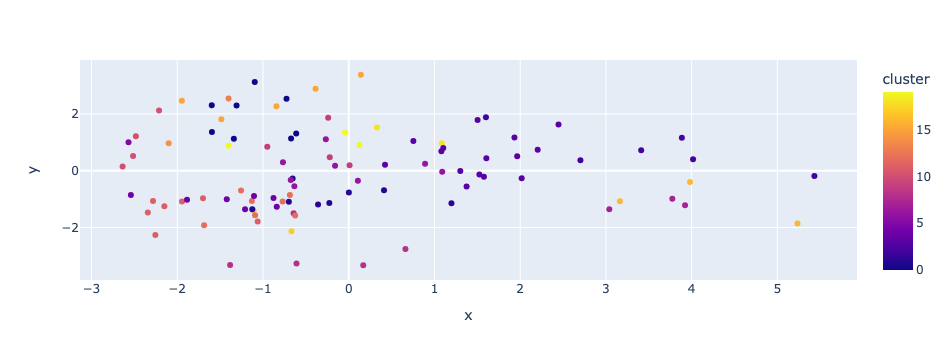

In [58]:
# Visualizing the Clusters with PCA

from sklearn.decomposition import PCA

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X1)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = data2_cleaned['track_name'].reset_index(drop=True)
projection['cluster'] = data2_cleaned['cluster_label'].reset_index(drop=True)



fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show()

In [148]:
!pip install spotipy

  Obtaining dependency information for spotipy from https://files.pythonhosted.org/packages/b8/e8/4c099f9431ec9a86f576b344702cd4446d1ff7df09b172dc1951f25d58b1/spotipy-2.23.0-py3-none-any.whl.metadata
  Obtaining dependency information for redis>=3.5.3 from https://files.pythonhosted.org/packages/bb/f1/a384c5582d9a28e4a02eb1a2c279668053dd09aafeb08d2bd4dd323fc466/redis-5.0.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.8/251.8 kB 18.7 MB/s eta 0:00:00


In [59]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict

# Make sure to import necessary libraries
import os
import pandas as pd

# Set your Spotify API credentials (replace these with your actual credentials)
client_id = 'd24891ceed9f4f19906312b9e4c37286'
client_secret = '1f970f2d93554644953038ede1359ab5'

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

def find_song(name, year):
    song_data = defaultdict()
    results = sp.search(q='track:{} year:{}'.format(name, year), limit=1)
    
    if results['tracks']['items'] == []:
        return None
    
    results = results['tracks']['items'][0]
    # print("Results Dictionary:", results)  # Print the entire results dictionary for debugging
    
    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]
    
    song_data['track_name'] = [name]
    song_data['year'] = [year]
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]
    
    for key, value in audio_features.items():
        song_data[key] = value
    
    return pd.DataFrame(song_data)

# Example usage
song_df = find_song('sneaky', '2024')
print(song_df)


  track_name  year  explicit  duration_ms  popularity  danceability  energy  \
0     sneaky  2024         1       201672          80         0.742   0.686   

   key  loudness  mode  ...  instrumentalness  liveness  valence    tempo  \
0    9    -7.527     1  ...           0.00459     0.147    0.312  155.036   

             type                      id  \
0  audio_features  2K7sv1mno9PvbXVBpqvSKn   

                                    uri  \
0  spotify:track:2K7sv1mno9PvbXVBpqvSKn   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2K7sv1mno9Pv...   

                                        analysis_url time_signature  
0  https://api.spotify.com/v1/audio-analysis/2K7s...              4  

[1 rows x 22 columns]


In [60]:
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

# number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy',
#   'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo', 'time_signature']

number_cols = list(X.columns)

def get_song_data(song, spotify_data):
    
    try:
        song_data = spotify_data[(spotify_data['track_name'] == song['track_name']) 
                                & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data
    
    except IndexError:
        return find_song(song['track_name'], song['year'])
        

def get_mean_vector(song_list, spotify_data):
    
    song_vectors = []
    
    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)  
    
    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)


def flatten_dict_list(dict_list):
    
    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []
    
    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)
            
    return flattened_dict


def recommend_songs( song_list, spotify_data, n_songs=10):
    
    metadata_cols = ['track_name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)
    
    song_center = get_mean_vector(song_list, spotify_data)
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])
    
    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['track_name'].isin(song_dict['track_name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')

In [61]:
recommend_songs([{'track_name': 'Sneaky', 'year':2024},
                {'track_name': 'redrum', 'year': 2024},
                {'track_name': 'a m a r i', 'year': 2021},
                {'track_name':'HONEST', 'year': 2021},
                {'track_name': 'Daylight', 'year': 2023}],  data2_cleaned)

KeyError: "['cluster', 'cluster_label'] not in index"

# Collaborative Filtering

## Preprocessing and Extraction of Data